Angel Josue Mazariegos Guzmán 19000522  -  Text Mining & Image Recognition   - Sección V

 
# Hoja de Trabajo # 1


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

---

---


## Problema 1:

In [64]:
def filter_color(imagen, color):

    img = cv2.imread(imagen)
    
    filtrada = np.zeros_like(img) # "Hoja en blanco" para imagen de salida
    
    if color == 1:
        filtrada[:, :, 0] = img[:, :, 0]  #azul
    elif color == 2:
        filtrada[:, :, 1] = img[:, :, 1]  # verde
    elif color == 3:
        filtrada[:, :, 2] = img[:, :, 2]  # rojo
    elif color == 10:
        filtrada[:, :, 1] = img[:, :, 1]  # verde
        filtrada[:, :, 2] = img[:, :, 2]  # rojo
    elif color == 20:
        filtrada[:, :, 0] = img[:, :, 0]  # azul
        filtrada[:, :, 1] = img[:, :, 1]  # verde
    elif color == 30:
        filtrada[:, :, 0] = img[:, :, 0]  # azul
        filtrada[:, :, 2] = img[:, :, 2]  # rojo

    return filtrada



- Color = 1: azul
- Color = 2: verde
- Color = 3: rojo
- Color = 10: rojo y verde
- Color = 20: verde y azul
- Color = 30: azul y rojo

### Pruebas:

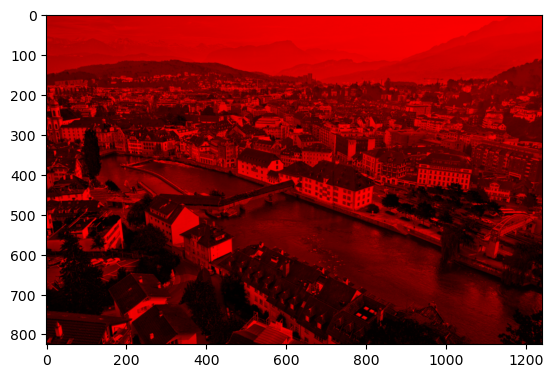

In [68]:
filtered_image = filter_color('Suiza.png', 1)
plt.imshow(filtered_image)
plt.show()

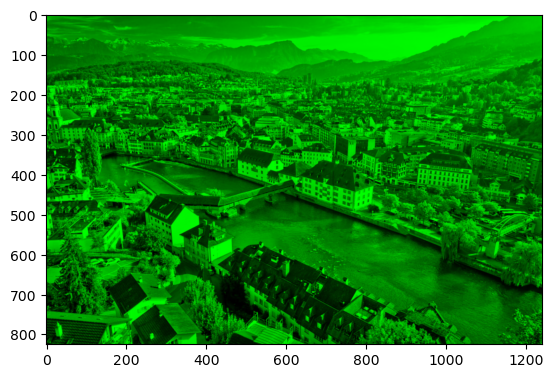

In [70]:
filtered_image = filter_color('Suiza.png', 2)
plt.imshow(filtered_image)
plt.show()

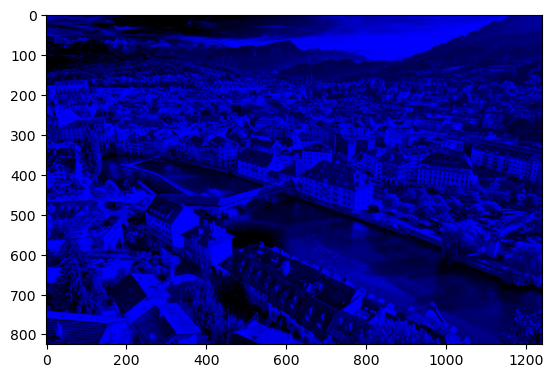

In [72]:
filtered_image = filter_color('Suiza.png', 3)
plt.imshow(filtered_image)
plt.show()

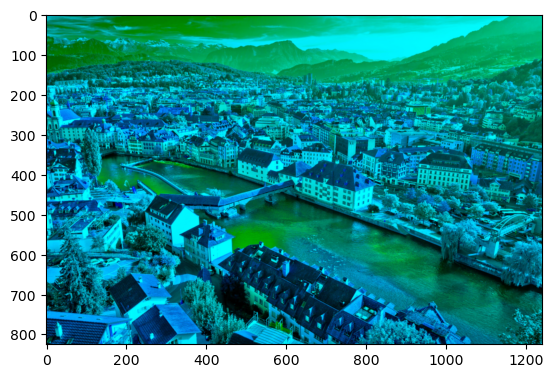

In [74]:
filtered_image = filter_color('Suiza.png', 10)
plt.imshow(filtered_image)
plt.show()

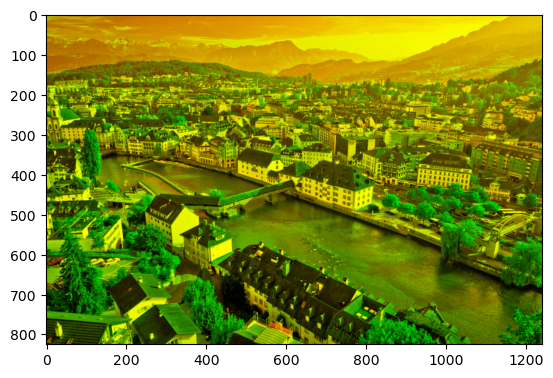

In [76]:
filtered_image = filter_color('Suiza.png', 20)
plt.imshow(filtered_image)
plt.show()

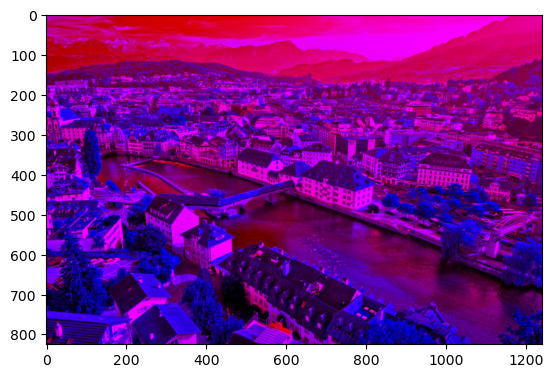

In [78]:
filtered_image = filter_color('Suiza.png', 30)
plt.imshow(filtered_image)
plt.show()

---

---

## Problema 2:

In [109]:
def gray2color(imgR, imgG, imgB):
    
    img_rojo = cv2.imread(imgR, cv2.IMREAD_GRAYSCALE)
    img_verde = cv2.imread(imgG, cv2.IMREAD_GRAYSCALE)
    img_azul = cv2.imread(imgB, cv2.IMREAD_GRAYSCALE)
    
    imagen_color = cv2.merge([img_azul, img_verde, img_rojo])
    
    return imagen_color
    

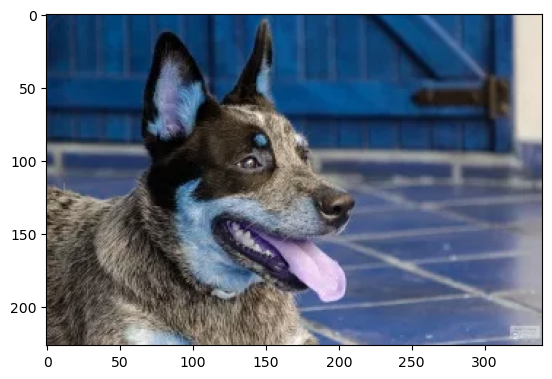

In [111]:
color = gray2color('perro_salida_gray_rojo.jpg','perro_salida_gray_verde.jpg','perro_salida_gray_azul.jpg')
plt.imshow(color)
plt.show()

---

---

## Problema 3:

In [139]:
def color2gray(img):
    
    imagen_color = cv2.imread(img)
    
    filtradaB = np.zeros_like(imagen_color) # "Hoja en blanco" para imagen de salida
    filtradaG = np.zeros_like(imagen_color) # "Hoja en blanco" para imagen de salida
    filtradaR = np.zeros_like(imagen_color) # "Hoja en blanco" para imagen de salida
    
    filtradaB[:, :, 0] = imagen_color[:, :, 0]  #azul
    filtradaG[:, :, 1] = imagen_color[:, :, 1]  # verde
    filtradaR[:, :, 2] = imagen_color[:, :, 2]  # rojo
        
    grisR = cv2.cvtColor(filtradaR, cv2.COLOR_BGR2GRAY)
    grisG = cv2.cvtColor(filtradaG, cv2.COLOR_BGR2GRAY)
    grisB = cv2.cvtColor(filtradaB, cv2.COLOR_BGR2GRAY)
    
    cv2.imwrite('problema3_gray_azul.png', grisB)
    cv2.imwrite('problema3_gray_verde.png', grisG)
    cv2.imwrite('problema3_gray_rojo.png', grisR)
    

In [141]:
color2gray('Suiza.png')

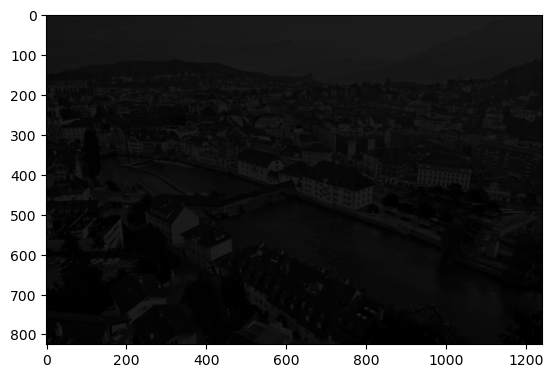

In [144]:
imagen = cv2.imread('Problema 3\problema3_gray_azul.png')
plt.imshow(imagen)
plt.show()

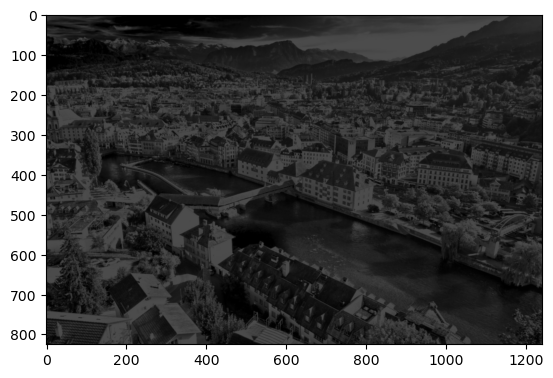

In [146]:
imagen = cv2.imread('Problema 3\problema3_gray_rojo.png')
plt.imshow(imagen)
plt.show()

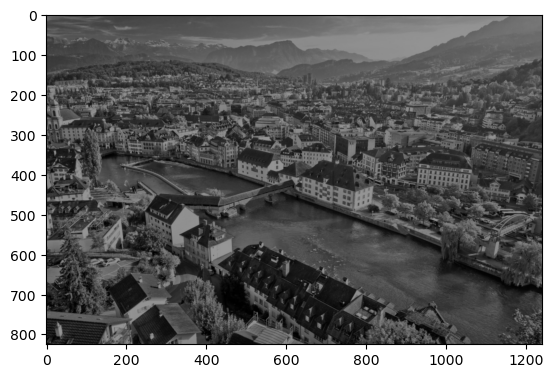

In [148]:
imagen = cv2.imread('Problema 3\problema3_gray_verde.png')
plt.imshow(imagen)
plt.show()

---

---

## Problema 4:

In [197]:
def histograma(img):
    imagen = cv2.imread(img)
    canal_azul, canal_verde, canal_rojo = cv2.split(imagen)

    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    
    gris_aritmetico = np.zeros((alto, ancho, 1))
    gris_ponderado = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = imagen[i, j]
            
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            gris_ponderado[i, j] = int(0.3 * red + 0.59 * green + 0.11 * blue)
    
    def mostrar_histograma(canal, color, titulo):
        hist, bins = np.histogram(canal, bins=256, range=(0, 256))
        valores = np.arange(256)
        media = np.sum(hist * valores) / np.sum(hist)
        
        plt.plot(hist, color=color)
        plt.axvline(x=media, color='k', linestyle='--')
        plt.title(titulo)
        plt.xlabel('Intensidad de píxel')
        plt.ylabel('Número de píxeles')
        plt.show()
 

    mostrar_histograma(canal_azul, 'b', 'Histograma del canal Azul')
    mostrar_histograma(canal_verde, 'g', 'Histograma del canal Verde')
    mostrar_histograma(canal_rojo, 'r', 'Histograma del canal Rojo')
    mostrar_histograma(gris_ponderado, 'gray', 'Histograma de la imagen en Escala de Grises')
    

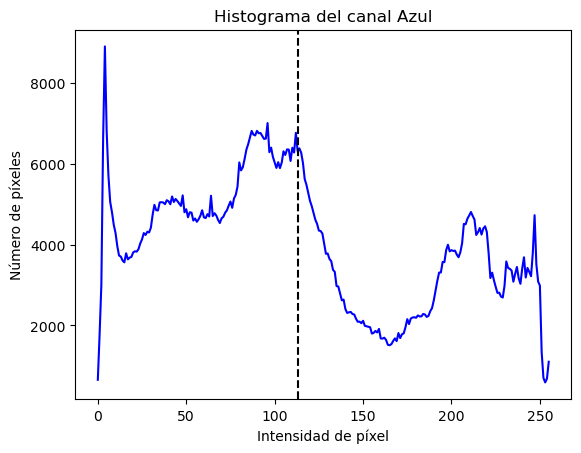

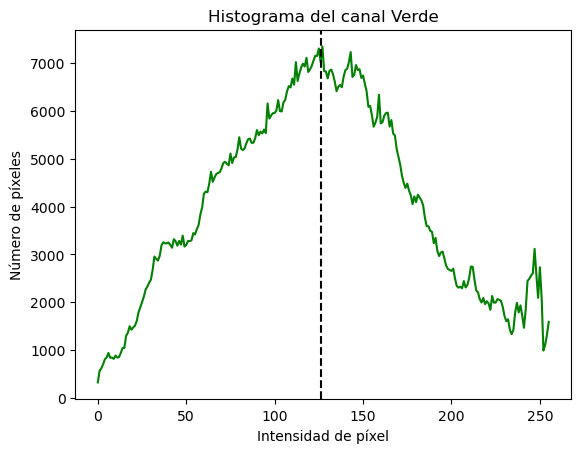

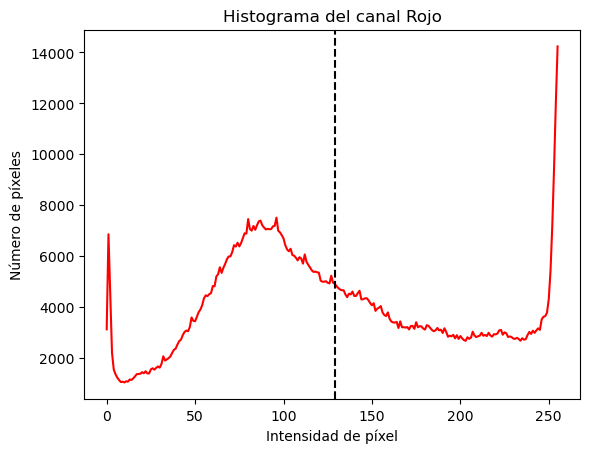

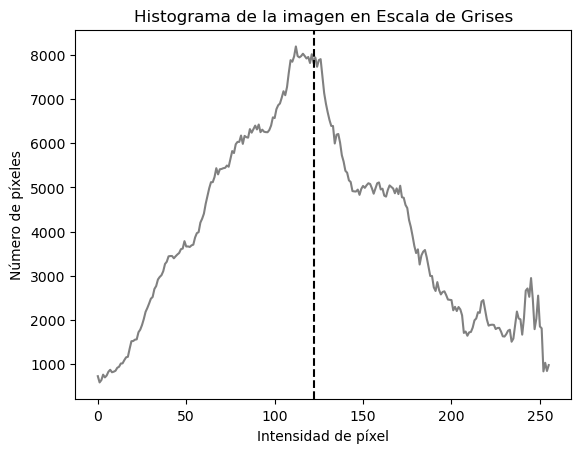

In [195]:
histograma('Suiza.png')

---

---

## Problema 5

In [272]:
def grises_ponderado(img,R,G,B):
    imagen = cv2.imread(img)

    alto = imagen.shape[0]
    ancho = imagen.shape[1]

    gris_ponderado = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = imagen[i, j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            gris_ponderado[i, j] = int(R * red + G * green + B * blue)

    plt.imshow(gris_ponderado, cmap='gray')
    plt.title("Gris Ponderado")
    plt.show()
        


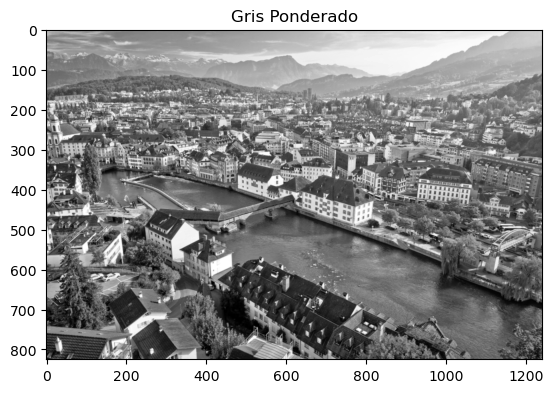

In [274]:
grises_ponderado('Suiza.png', 0.3, 0.59, 0.11)

In [46]:
!git init

Reinitialized existing Git repository in C:/Users/angel/Universidad/Text Mining/Hoja_de_trabajo_1/.git/


In [60]:
!git status

On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   Hoja1.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Problema 3/
	README.md
	Suiza.png
	imagen1_salida_gray_azul.jpg
	imagen1_salida_gray_rojo.jpg
	imagen1_salida_gray_verde.jpg
	imagen2_salida_gray_azul.jpg
	imagen2_salida_gray_rojo.jpg
	imagen2_salida_gray_verde.jpg
	perro_salida_gray_azul.jpg
	perro_salida_gray_rojo.jpg
	perro_salida_gray_verde.jpg



In [55]:
!git remote add  https://github.com/ElMangel/hoja1

usage: git remote add [<options>] <name> <url>

    -f, --[no-]fetch      fetch the remote branches
    --[no-]tags           import all tags and associated objects when fetching
                          or do not fetch any tag at all (--no-tags)
    -t, --[no-]track <branch>
                          branch(es) to track
    -m, --[no-]master <branch>
                          master branch
    --[no-]mirror[=(push|fetch)]
                          set up remote as a mirror to push to or fetch from



In [58]:
!git add Hoja1.ipynb

In [38]:
!git status

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Problema 3/
	README.md
	Suiza.png
	imagen1_salida_gray_azul.jpg
	imagen1_salida_gray_rojo.jpg
	imagen1_salida_gray_verde.jpg
	imagen2_salida_gray_azul.jpg
	imagen2_salida_gray_rojo.jpg
	imagen2_salida_gray_verde.jpg
	perro_salida_gray_azul.jpg
	perro_salida_gray_rojo.jpg
	perro_salida_gray_verde.jpg

nothing added to commit but untracked files present (use "git add" to track)


In [22]:
!git commit -m "Text Mining - Hoja de trabajo 1 - 19000522"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'angel@AlienwareMangel.(none)')


In [36]:
!git add Hoja1.ipynb
!git commit -m "Text Mining - Hoja de trabajo 1 - 19000522"
!git push --set-upstream origin master

[main (root-commit) 0432bc2] Text Mining - Hoja de trabajo 1 - 19000522
 1 file changed, 915 insertions(+)
 create mode 100644 Hoja1.ipynb


error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/ElMangel/Hoja_Trabajo_1.git'


In [321]:
from github import Github